### <center>MUHAMMAD DZAKI AL-QUSHOYYI</center>
#### <center>F1D022143</center>

# Here you can put your extraordinary code

In [223]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

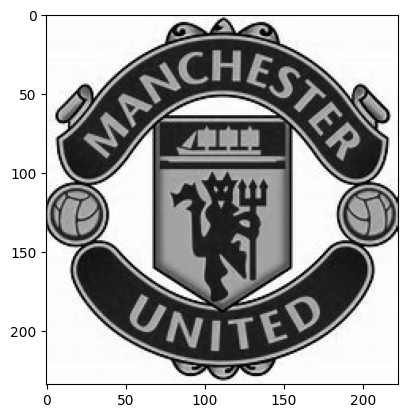

In [224]:
image = plt.imread('../assets/manchester_united.jpeg')
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
plt.imshow(image, cmap="gray")

In [225]:
def FilterModus(image, kernel):
    baris, kolom = kernel.shape
    hasil = np.zeros(image.shape)
    _baris = int((baris-1)/2)
    _kolom = int((kolom-1)/2)
    _image = np.pad(image,((_baris,_baris),(_kolom,_kolom)),mode='edge')
    for i in range(hasil.shape[0]):
        for j in range(hasil.shape[1]):
            Modus = _image[i:i+baris, j:j+kolom] * kernel
            index = np.zeros(256)  
            for k in range(baris):
                for l in range(kolom):
                    index[int(Modus[k, l])] += 1
            Max = np.max(index)
            for m in range(index.shape[0]):
                if Max == index[m]:
                    _Max = m
            hasil[i, j] = _Max
    return hasil

In [226]:
def FilterMedian(image, kernel):
    tengah = int(np.prod(kernel.shape) / 2)
    hasil = np.zeros(image.shape)
    baris, kolom = kernel.shape
    _baris = int((baris-1)/2)
    _kolom = int((kolom-1)/2)
    _image = np.pad(image,((_baris,_baris),(_kolom,_kolom)),mode='edge')
    for i in range(hasil.shape[0]):
        for j in range(hasil.shape[1]):
            Median = _image[i:i+baris, j:j+kolom] * kernel
            Median = np.sort(Median.flatten())
            median_value = Median[tengah]
            hasil[i, j] = median_value
    return hasil

In [227]:
def FilterMean(image, kernel):
    baris, kolom = kernel.shape
    hasil = np.zeros(image.shape)
    _baris = int((baris-1)/2)
    _kolom = int((kolom-1)/2)
    _image = np.pad(image,((_baris,_baris),(_kolom,_kolom)),mode='edge')
    for i in range(hasil.shape[0]):
        for j in range(hasil.shape[1]):
            ratarata = np.sum(_image[i:i+baris,j:j+kolom] * kernel)/(baris*kolom)
            hasil[i,j] = ratarata
    return hasil

In [228]:
def mode(array):
    
    scores = np.zeros(np.max(array.flatten()) + 1)
    
    for i in array.flatten():
        scores[i] += 1
    
    return np.argmax(scores)

In [229]:
def mode_filter(image, y, x, padding_size):
    
    padded_arr = np.pad(image, padding_size, mode='constant')
    
    copy_arr = np.zeros_like(image).astype(np.float32)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            
            yesmode = mode((padded_arr[i:i + y, j:j + x]).flatten())
            copy_arr[i, j] = yesmode / y * x
    
    return copy_arr.astype(int)

In [230]:
def konvolusi(image, kernel):
    
    pad_size = kernel.shape[0] // 2
    gambar_input = np.pad(image, pad_size, mode='constant')

    gambar_konvolusi = np.zeros_like(image).astype(np.float32)

    baris, kolom = image.shape

    for i in range(baris):
        for j in range(kolom):

            gambar_konvolusi[i, j] = np.sum(gambar_input[i:i + kernel.shape[0], j:j + kernel.shape[1]] * kernel)

    return gambar_konvolusi

In [231]:
print(np.float32(8/9))
print(np.float32(1/9))

0.8888889
0.11111111


In [232]:
kernel3 = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
])

kernel9 = np.array([
    [1/81, 1/81,1/81, 1/81, 1/81, 1/81, 1/81, 1/81,1/81],
    [1/81, 1/81,1/81, 1/81, 1/81, 1/81, 1/81, 1/81,1/81],
    [1/81, 1/81,1/81, 1/81, 1/81, 1/81, 1/81, 1/81,1/81],
    [1/81, 1/81,1/81, 1/81, 1/81, 1/81, 1/81, 1/81,1/81],
    [1/81, 1/81,1/81, 1/81, 1/81, 1/81, 1/81, 1/81,1/81],
    [1/81, 1/81,1/81, 1/81, 1/81, 1/81, 1/81, 1/81,1/81],
    [1/81, 1/81,1/81, 1/81, 1/81, 1/81, 1/81, 1/81,1/81],
    [1/81, 1/81,1/81, 1/81, 1/81, 1/81, 1/81, 1/81,1/81],
    [1/81, 1/81,1/81, 1/81, 1/81, 1/81, 1/81, 1/81,1/81]
])

In [233]:
smooth = np.array([
    [1/10, 1/10, 1/10],
    [1/10, 1/5, 1/10],
    [1/10, 1/10, 1/10]
])

sharpen = np.array([
    [1/9, 1/9, 1/9],
    [1/9, 8/9, 1/9],
    [1/9, 1/9, 1/9]
])

In [234]:
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

prewitt_y = np.array([[1, 1, 1],
                      [0, 0, 0],
                      [-1, -1, -1]])

robert_x = np.array([[1, 0],
                     [0, -1]])

robert_y = np.array([[0, 1],
                     [-1, 0]])

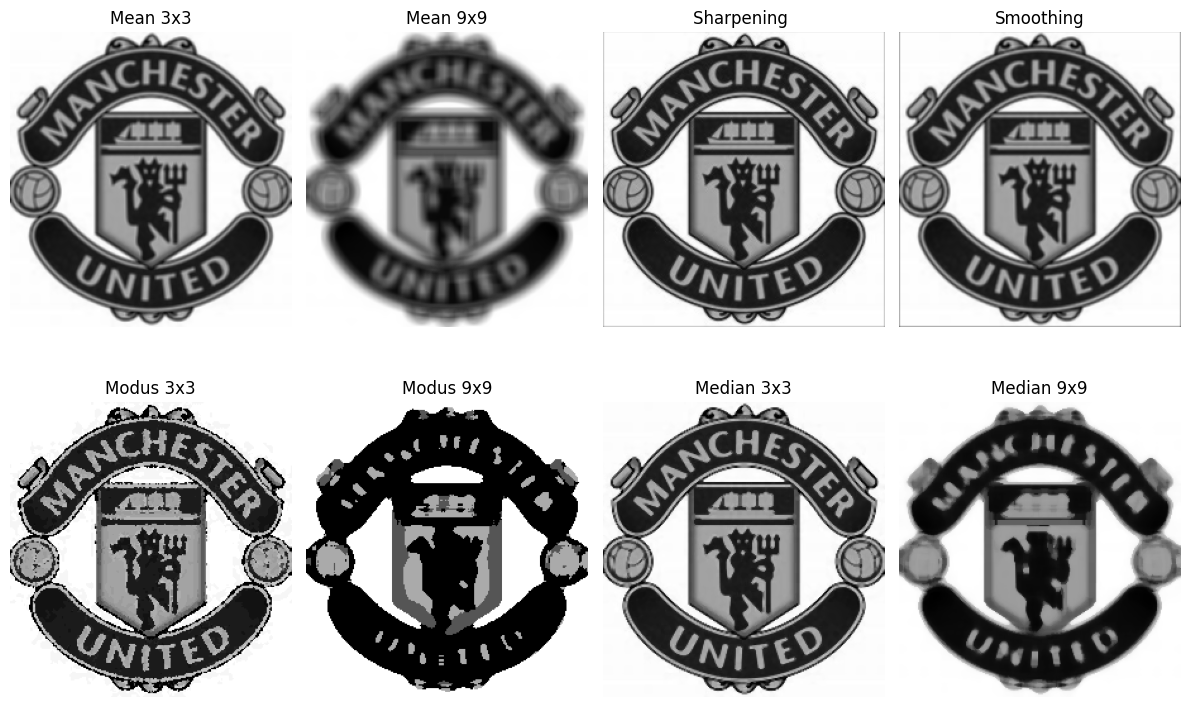

In [235]:
Mn1 = FilterMean(image, kernel3)
Mn2 = FilterMean(image, kernel9)
sp1 = konvolusi(image, sharpen)
smot1 = konvolusi(image, smooth)
MS1 = FilterModus(image, kernel3)
MS2 = FilterModus(image, kernel9)
MD1 = FilterMedian(image, kernel3)
MD2 = FilterMedian(image, kernel9)

plt.figure(figsize=(12, 8)) 

plt.subplot(2, 4, 1) 
plt.title('Mean 3x3')
plt.imshow(Mn1, cmap="gray")
plt.axis('off')

plt.subplot(2, 4, 2) 
plt.title('Mean 9x9')
plt.imshow(Mn2, cmap="gray")
plt.axis('off')

plt.subplot(2, 4, 3) 
plt.title('Sharpening ') 
plt.imshow(sp1, cmap="gray") 
plt.axis('off')

plt.subplot(2, 4, 4) 
plt.title('Smoothing')  
plt.imshow(smot1, cmap="gray") 
plt.axis('off')

plt.subplot(2, 4, 5) 
plt.title('Modus 3x3')
plt.imshow(MS1, cmap="gray")
plt.axis('off')

plt.subplot(2, 4, 6)  
plt.title('Modus 9x9')
plt.imshow(MS2, cmap="gray")
plt.axis('off')

plt.subplot(2, 4, 7) 
plt.title('Median 3x3')
plt.imshow(MD1, cmap="gray")
plt.axis('off')

plt.subplot(2, 4, 8) 
plt.title('Median 9x9')
plt.imshow(MD2, cmap="gray")
plt.axis('off')

plt.tight_layout()
plt.show()


In [236]:
def edge_detection_sobel(image):

    edge_x = konvolusi(image, sobel_x)
    edge_y = konvolusi(image, sobel_y)

    edge_magnitude = np.sqrt(edge_x ** 2 + edge_y ** 2)
    edge_direction = np.arctan2(edge_y, edge_x)

    return edge_magnitude, edge_direction

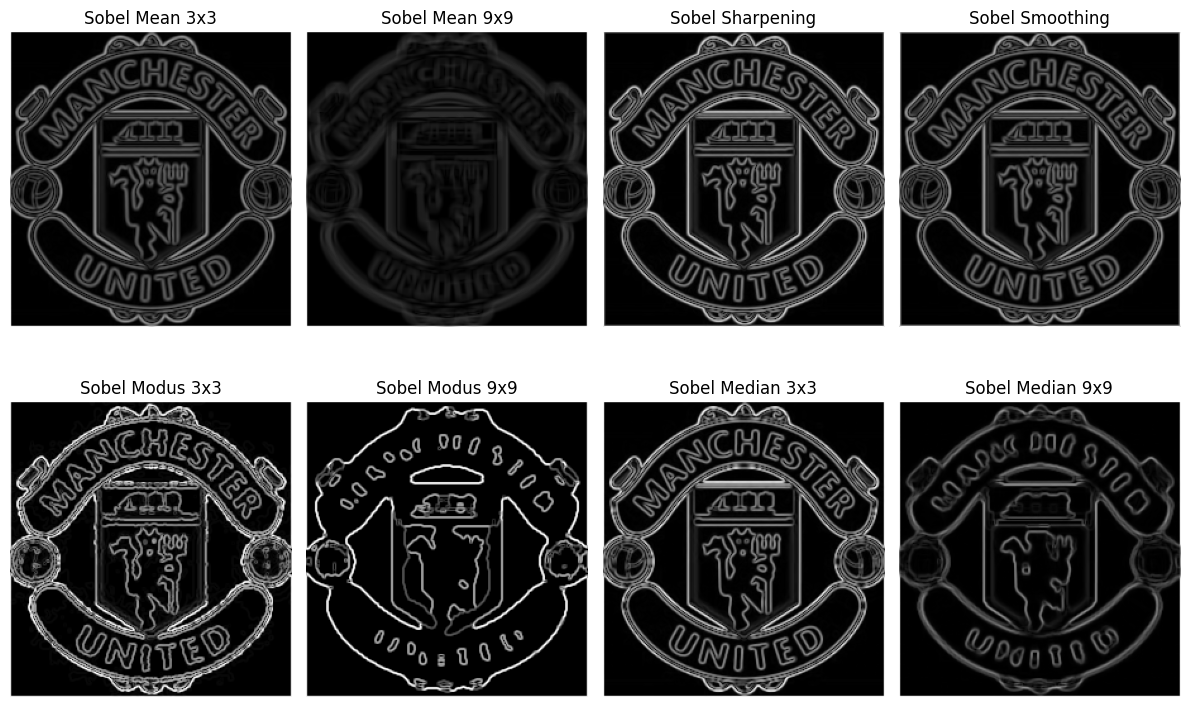

In [237]:
edge_mean_3x3, _ = edge_detection_sobel(Mn1)
edge_mean_9x9, _ = edge_detection_sobel(Mn2)
edge_sharpen, _ = edge_detection_sobel(sp1)
edge_smooth, _ = edge_detection_sobel(smot1)
edge_modus_3x3, _ = edge_detection_sobel(MS1)
edge_modus_9x9, _ = edge_detection_sobel(MS2)
edge_median_3x3, _ = edge_detection_sobel(MD1)
edge_median_9x9, _ = edge_detection_sobel(MD2)

plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.title('Sobel Mean 3x3')
plt.imshow(edge_mean_3x3, cmap="gray")
plt.axis('off')

plt.subplot(2, 4, 2)
plt.title('Sobel Mean 9x9')
plt.imshow(edge_mean_9x9, cmap="gray")
plt.axis('off')

plt.subplot(2, 4, 3)
plt.title('Sobel Sharpening')
plt.imshow(edge_sharpen, cmap="gray")
plt.axis('off')

plt.subplot(2, 4, 4)
plt.title('Sobel Smoothing')
plt.imshow(edge_smooth, cmap="gray")
plt.axis('off')

plt.subplot(2, 4, 5)
plt.title('Sobel Modus 3x3')
plt.imshow(edge_modus_3x3, cmap="gray")
plt.axis('off')

plt.subplot(2, 4, 6)
plt.title('Sobel Modus 9x9')
plt.imshow(edge_modus_9x9, cmap="gray")
plt.axis('off')

plt.subplot(2, 4, 7)
plt.title('Sobel Median 3x3')
plt.imshow(edge_median_3x3, cmap="gray")
plt.axis('off')

plt.subplot(2, 4, 8)
plt.title('Sobel Median 9x9')
plt.imshow(edge_median_9x9, cmap="gray")
plt.axis('off')

plt.tight_layout()
plt.show()


In [238]:
def edge_detection_prewitt(image):
   
    edge_x = konvolusi(image, prewitt_x)
    edge_y = konvolusi(image, prewitt_y)

    edge_magnitude = np.sqrt(edge_x ** 2 + edge_y ** 2)
    edge_direction = np.arctan2(edge_y, edge_x)

    return edge_magnitude, edge_direction


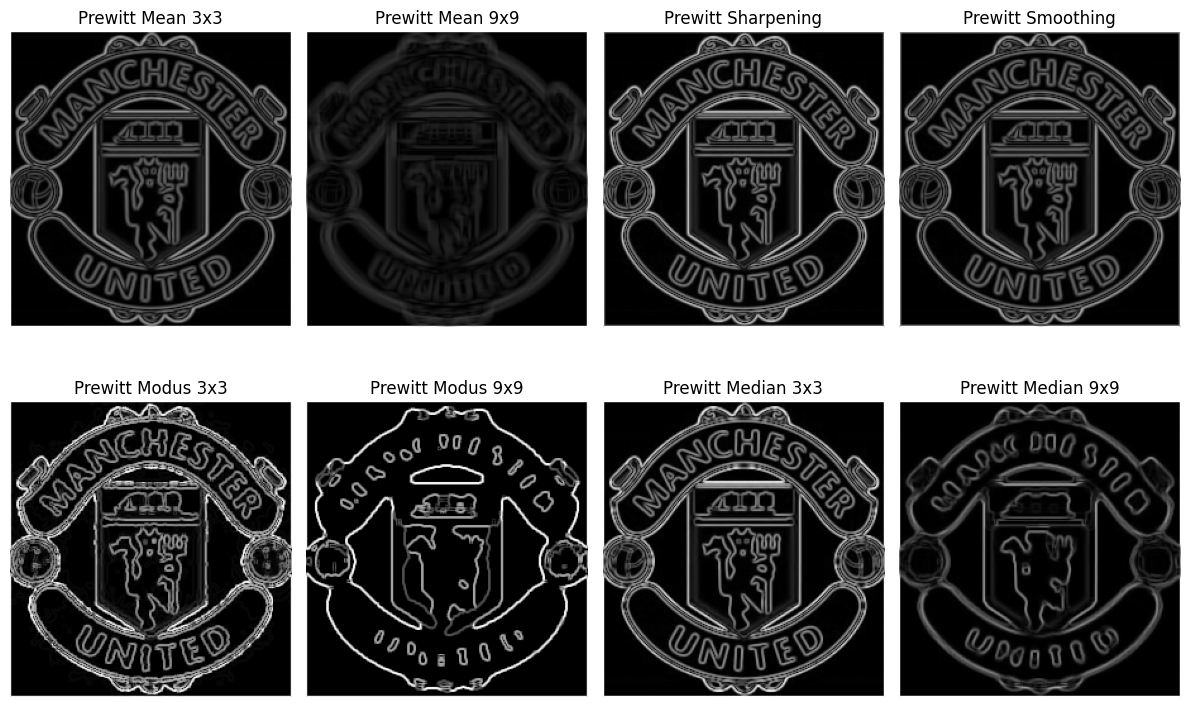

In [239]:
edge_mean_3x3_prewitt, _ = edge_detection_prewitt(Mn1)
edge_mean_9x9_prewitt, _ = edge_detection_prewitt(Mn2)
edge_sharpen_prewitt, _ = edge_detection_prewitt(sp1)
edge_smooth_prewitt, _ = edge_detection_prewitt(smot1)
edge_modus_3x3_prewitt, _ = edge_detection_prewitt(MS1)
edge_modus_9x9_prewitt, _ = edge_detection_prewitt(MS2)
edge_median_3x3_prewitt, _ = edge_detection_prewitt(MD1)
edge_median_9x9_prewitt, _ = edge_detection_prewitt(MD2)

plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.title('Prewitt Mean 3x3')
plt.imshow(edge_mean_3x3_prewitt, cmap="gray")
plt.axis('off')

plt.subplot(2, 4, 2)
plt.title('Prewitt Mean 9x9')
plt.imshow(edge_mean_9x9_prewitt, cmap="gray")
plt.axis('off')

plt.subplot(2, 4, 3)
plt.title('Prewitt Sharpening')
plt.imshow(edge_sharpen_prewitt, cmap="gray")
plt.axis('off')

plt.subplot(2, 4, 4)
plt.title('Prewitt Smoothing')
plt.imshow(edge_smooth_prewitt, cmap="gray")
plt.axis('off')

plt.subplot(2, 4, 5)
plt.title('Prewitt Modus 3x3')
plt.imshow(edge_modus_3x3_prewitt, cmap="gray")
plt.axis('off')

plt.subplot(2, 4, 6)
plt.title('Prewitt Modus 9x9')
plt.imshow(edge_modus_9x9_prewitt, cmap="gray")
plt.axis('off')

plt.subplot(2, 4, 7)
plt.title('Prewitt Median 3x3')
plt.imshow(edge_median_3x3_prewitt, cmap="gray")
plt.axis('off')

plt.subplot(2, 4, 8)
plt.title('Prewitt Median 9x9')
plt.imshow(edge_median_9x9_prewitt, cmap="gray")
plt.axis('off')

plt.tight_layout()
plt.show()


In [240]:
def edge_detection_robert(image):

    edge_x = konvolusi(image, robert_x)
    edge_y = konvolusi(image, robert_y)

    edge_magnitude = np.sqrt(edge_x ** 2 + edge_y ** 2)
    edge_direction = np.arctan2(edge_y, edge_x)

    return edge_magnitude, edge_direction

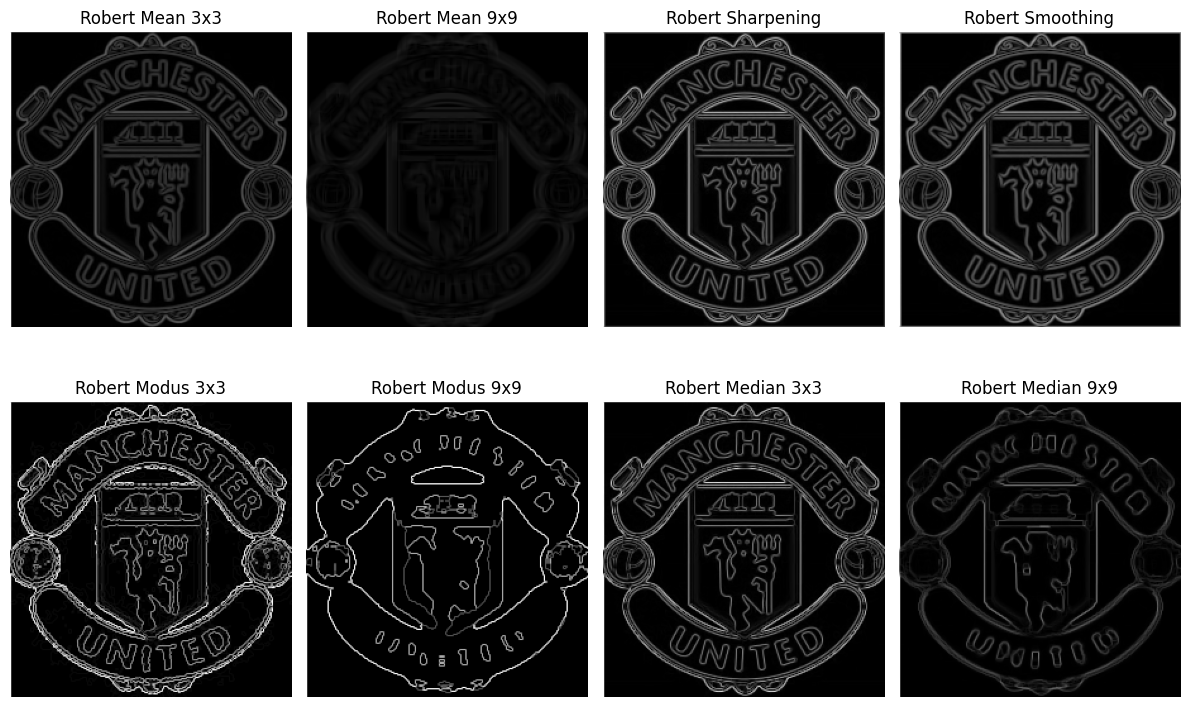

In [241]:
edge_mean_3x3_robert, _ = edge_detection_robert(Mn1)
edge_mean_9x9_robert, _ = edge_detection_robert(Mn2)
edge_sharpen_robert, _ = edge_detection_robert(sp1)
edge_smooth_robert, _ = edge_detection_robert(smot1)
edge_modus_3x3_robert, _ = edge_detection_robert(MS1)
edge_modus_9x9_robert, _ = edge_detection_robert(MS2)
edge_median_3x3_robert, _ = edge_detection_robert(MD1)
edge_median_9x9_robert, _ = edge_detection_robert(MD2)

plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.title('Robert Mean 3x3')
plt.imshow(edge_mean_3x3_robert, cmap="gray")
plt.axis('off')

plt.subplot(2, 4, 2)
plt.title('Robert Mean 9x9')
plt.imshow(edge_mean_9x9_robert, cmap="gray")
plt.axis('off')

plt.subplot(2, 4, 3)
plt.title('Robert Sharpening')
plt.imshow(edge_sharpen_robert, cmap="gray")
plt.axis('off')

plt.subplot(2, 4, 4)
plt.title('Robert Smoothing')
plt.imshow(edge_smooth_robert, cmap="gray")
plt.axis('off')

plt.subplot(2, 4, 5)
plt.title('Robert Modus 3x3')
plt.imshow(edge_modus_3x3_robert, cmap="gray")
plt.axis('off')

plt.subplot(2, 4, 6)
plt.title('Robert Modus 9x9')
plt.imshow(edge_modus_9x9_robert, cmap="gray")
plt.axis('off')

plt.subplot(2, 4, 7)
plt.title('Robert Median 3x3')
plt.imshow(edge_median_3x3_robert, cmap="gray")
plt.axis('off')

plt.subplot(2, 4, 8)
plt.title('Robert Median 9x9')
plt.imshow(edge_median_9x9_robert, cmap="gray")
plt.axis('off')

plt.tight_layout()
plt.show()
